# Assignment 2


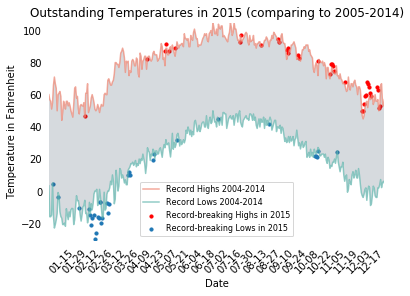

In [1]:
"""
# 1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.

#2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.

#3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.

#4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# load the csv
df = pd.read_csv('tempinfo.csv', skiprows=0)
df = df.sort_values(by=['Date'])
df = df.set_index('Date')

# separate <2015 and 2015
drop_list = []
rename_list = []
leap_days = []

for date in df.index:
    if date[:4] == '2015':
        drop_list.append(date)
    elif date[5:] == '02-29':
        leap_days.append(date)
    else:
        rename_list.append(date[5:])

# get rid of leap days
df = df.drop(leap_days)

# get 2015 data
df = df.reset_index()
df_2015 = df.loc[df['Date'].isin(drop_list)]
df_2015 = df_2015

# drop 2015 data
df = df.set_index('Date')
df = df.drop(drop_list)

# relace year-month-day to month-day
df = df.reset_index()
df['Date'] = rename_list

# get record high, low
highs_2015 = df_2015.groupby(['Date'])['Data_Value'].max()
highs_2015 = highs_2015.to_frame()
record_highs = df.groupby(['Date'])['Data_Value'].max()
record_highs = record_highs.to_frame()

lows_2015 = df_2015.groupby(['Date'])['Data_Value'].min()
lows_2015 = lows_2015.to_frame()
record_lows = df.groupby(['Date'])['Data_Value'].min()
record_lows = record_lows.to_frame()


# get x, y list for plot
day_list = np.array(record_highs.index)
max_temp = np.array([ ((x/10 * 1.8) + 32) for x in record_highs['Data_Value'].values])
min_temp = np.array([ ((x/10 * 1.8) + 32) for x in record_lows['Data_Value'].values])
max_2015 = np.array([ ((x/10 * 1.8) + 32) for x in highs_2015['Data_Value'].values])
min_2015 =  np.array([ ((x/10 * 1.8) + 32) for x in lows_2015['Data_Value'].values])


# get outta range 2015 days & values

outstanding_days_hot = []
outstanding_values_hot = []
zip_all_highs = zip(day_list, max_temp, max_2015)
for day, temp_x, temp_y in zip_all_highs:
#     print(day, temp_x, temp_y)
    if temp_y > temp_x:
        outstanding_days_hot.append(day)
        outstanding_values_hot.append(temp_y)

outstanding_days_cold = []
outstanding_values_cold = []
zip_all_lows = zip(day_list, min_temp, min_2015)
for day, temp_x, temp_y in zip_all_lows:
#     print(day, temp_x, temp_y)
    if temp_y < temp_x:
        outstanding_days_cold.append(day)
        outstanding_values_cold.append(temp_y)


# basic plotting

fig = plt.figure()
plt.plot(day_list, max_temp, '#ee8572', alpha=0.7, label='Record Highs 2004-2014')
plt.plot(day_list, min_temp, '#63b7af', alpha=0.7, label='Record Lows 2004-2014')
plt.scatter(outstanding_days_hot, outstanding_values_hot, s=10, c='red', label='Record-breaking Highs in 2015')
plt.scatter(outstanding_days_cold, outstanding_values_cold, s=10, label='Record-breaking Lows in 2015')
plt.gca().fill_between(range(len(max_temp)),
                       max_temp, min_temp,
                       facecolor='#35495e',
                       alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Temperature in Fahrenheit')
plt.title('Outstanding Temperatures in 2015 (comparing to 2005-2014)')
plt.legend(fontsize=8)

# get rid of ticks and spines

plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=True)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)

# lowering tick frequency to biweekly
plt.xticks(day_list[::14])

# rotate x-labels
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)

# y-axis padding
plt.margins(-0.001)

plt.show()
